In [95]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

In [33]:
low_density = ["4", "20", "148"]
high_density = ["123", "211", "224"]
dataY = []
data = []
names = []
for filename in os.listdir(os.getcwd() + "\data"):
    measure = []
    names.append(filename)
    dense = 0
    for h in high_density:
        if h in filename:  
            dense = 1
    dataY.append(dense)
    with open(os.path.join(os.getcwd() + "\data", filename), 'r') as f: # open in readonly mode
        
        rows = f.read().splitlines()
        for i,r in enumerate(rows):
            if(i < 1000):
                continue
            if(i == 5000):
                break
            col = r.split("\t")
            measure.append(col[1])
        data.append(measure)
        
print(dataY)


[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [66]:
for i, d in enumerate(data):
    if "A" in names[i]:
        print(len(d))
        print(names[i])
        print(i)
data = np.array(data, dtype=float)
x_train = np.empty(data.shape)
for i, d in enumerate(data):
    print(d.mean())
    x_train[i] = d / (d.max() - d.min())
    mean = d.mean()  / (d.max() - d.min())
    x_train[i] = x_train[i] - mean
y_train = np.array(dataY, dtype=float)
print(x_train)


4000
W123A
0
4000
W148A
6
4000
W20A
12
4000
W211A
17
4000
W224A
23
4000
W4A
29
-0.00030250000000000014
-2.175000000000016e-05
-0.00017250000000000015
-1.7750000000000008e-05
-0.00022374999999999977
0.00021650000000000003
-0.00025124999999999995
4.375000000000011e-05
0.00019874999999999998
9.474999999999978e-05
-1.9249999999999817e-05
-2.3500000000000005e-05
0.0001005000000000003
-9.850000000000002e-05
0.0001205000000000002
2.199999999999992e-05
-3.549999999999992e-05
-0.00022475000000000064
0.00025874999999999965
0.0002227499999999992
-0.00018650000000000022
0.00011474999999999982
0.00010999999999999995
-0.00030400000000000034
-0.00044325
-0.00023050000000000002
-6.624999999999983e-05
2.9500000000000046e-05
-5.275000000000002e-05
0.0001859999999999999
-3.350000000000041e-05
-0.00012525000000000004
2.7000000000000046e-05
0.00010199999999999985
3.725000000000003e-05
[[ 1.52010050e-03  1.65954774e-02  6.54522613e-03 ... -1.35552764e-02
  -1.85804020e-02 -1.35552764e-02]
 [-1.03497921e-02 

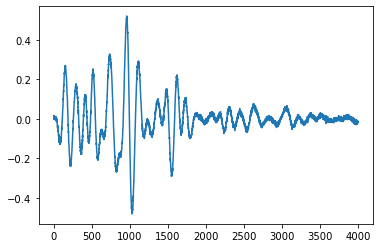

1.0


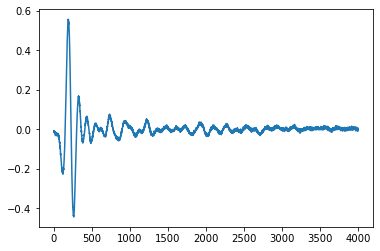

1.0


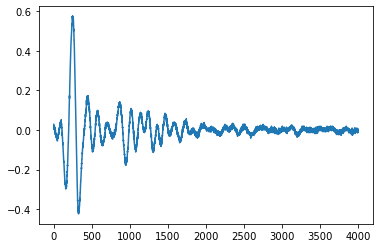

1.0


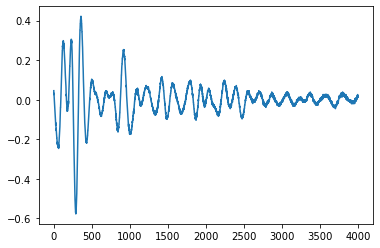

1.0


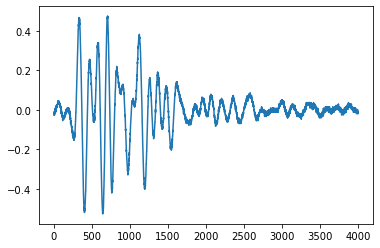

1.0


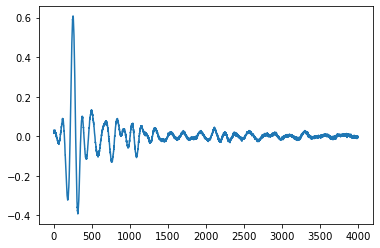

1.0


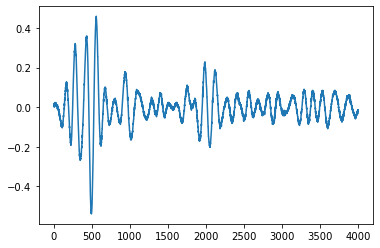

0.0


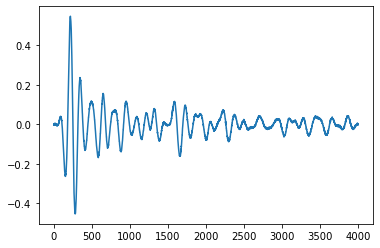

0.0


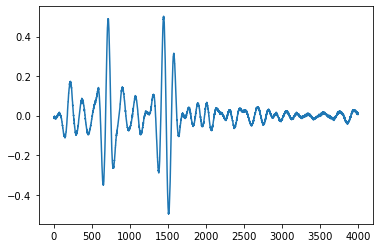

0.0


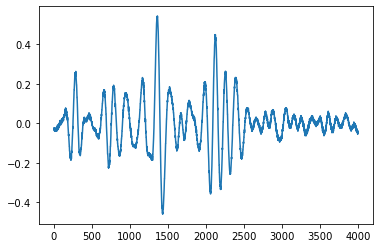

0.0


In [67]:
for i in range(10):
    plt.plot(x_train[i])
    plt.show()
    print(y_train[i])

In [68]:

print(f"Training labels has shape: {y_train.shape} and dtype: {y_train.dtype}")
print(f"Training images has shape: {x_train.shape} and dtype: {x_train.dtype}")

Training labels has shape: (35,) and dtype: float64
Training images has shape: (35, 4000) and dtype: float64


In [69]:
def create_dataset(data, dataY, batch_size):

    # Generate a TF Dataset from the series values
    dataY = np.reshape(dataY, (-1, 1))
    dataset = tf.data.Dataset.from_tensor_slices((data, dataY))
    dataset = tf.data.Dataset.shuffle(dataset, buffer_size=30)
    # for x, y in dataset:
    #     print(x.numpy(), y.numpy())
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [78]:
class Autoencoder(tf.keras.models.Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            #tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim, activation='relu'),
            tf.keras.layers.Dense(latent_dim//2, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(tf.math.reduce_prod(shape), activation='tanh'),
            #tf.keras.layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

shape = x_train.shape[1:]
print(shape)
latent_dim = 32
autoencoder = Autoencoder(latent_dim, shape)

(4000,)


In [79]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

In [80]:
#dataset = create_dataset(data, data, 5)
print(data.shape)
autoencoder.fit(x_train, x_train, epochs = 300, shuffle=True)

(35, 4000)
Epoch 1/300
2/2 [==============================] - 1s 5ms/step - loss: 0.0123
Epoch 2/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0122
Epoch 3/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 4/300
2/2 [==============================] - 0s 6ms/step - loss: 0.0121
Epoch 5/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0121
Epoch 6/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 7/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0120
Epoch 8/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 9/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 10/300
2/2 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 11/300
2/2 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 12/300
2/2 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 13/300
2/2 [==============================] 

In [81]:
encoded_imgs = autoencoder.encoder(x_train).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [86]:
print(x_train.shape)
print(encoded_imgs.shape)
print(encoded_imgs)
print(decoded_imgs.shape)

(35, 4000)
(35, 16)
[[1.2360489  0.         0.         0.         0.         0.9533066
  0.         0.         0.         3.0512898  1.3020228  2.9819262
  0.         0.         2.0157294  3.748538  ]
 [0.         0.         0.         2.0695474  1.2717499  0.9756761
  0.         0.22413391 0.9964131  0.48222876 0.         1.0434531
  0.         1.8728585  0.18853092 0.        ]
 [0.         0.         2.9037232  1.6920967  0.         1.7385697
  3.8426528  1.9977632  0.53806376 0.         3.1085277  0.
  0.30754885 0.6632775  0.         0.18245287]
 [0.9946669  0.         0.         1.4512107  0.16978769 1.1838334
  1.98071    0.         0.9970335  1.1321713  0.         0.
  0.         0.         0.         0.        ]
 [4.1684427  0.         1.9304328  2.4107132  4.5418935  2.4793959
  0.         0.         2.5845115  0.         0.         0.
  0.         1.1318156  1.5016154  0.        ]
 [0.91819227 0.         2.2475452  1.2048156  0.         0.9525827
  4.2512174  1.6128951  0.270

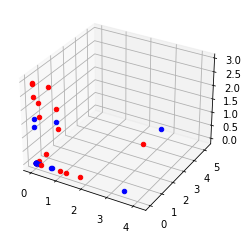

In [103]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i, d in enumerate(encoded_imgs):
    if(dataY[i] == 1):
        ax.scatter(d[0],d[1],d[2], c='red')
    else:
        ax.scatter(d[0],d[1],d[2], c='blue')

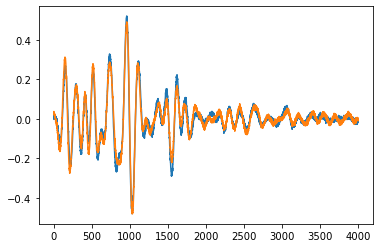

In [83]:
plt.plot(x_train[0])
plt.plot(decoded_imgs[0])
plt.show()

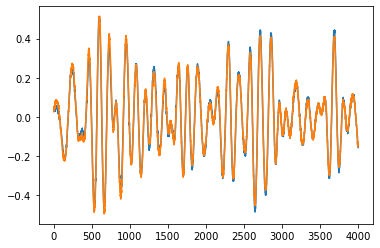

In [87]:
plt.plot(x_train[34])
plt.plot(decoded_imgs[34])
plt.show()

In [122]:
from tensorboard.plugins import projector

In [ ]:
# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir='/logs/test/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save Labels separately on a line-by-line manner.
with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
  for subwords in encoder.subwords:
    f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown".
  for unknown in range(1, encoder.vocab_size - len(encoder.subwords)):
    f.write("unknown #{}\n".format(unknown))


# Save the weights we want to analyze as a variable. Note that the first
# value represents any unknown word, which is not in the metadata, here
# we will remove this value.
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are the
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`.
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)